# Problem $#2$ Linear Regression
## Proposed model y =  $\theta$<sub>1</sub>*x + $\theta$<sub>0</sub>

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## Model function

In [2]:
def linear_model(x, theta):
    return x.dot(theta[1:]) + theta[0]

## Gradien function: $\nabla J$

In [3]:
def cost_gradient(x, y, model, theta):
    grad = np.zeros(len(theta))
    for i in range(len(x)):
        temp = model(x[i], theta) - y[i]
        for j in range(len(theta)):
            if j==0:
                grad[j] += temp
            else:    
                grad[j] += temp * x[i][j - 1]
    return grad / len(x)

## Algoritmo de descenso en gradiente: $\theta \leftarrow \theta - \alpha \nabla J$

In [4]:
def gradient_descend(x, y, model, gradient, theta, alpha, epsilon, max_iter):
    iter = 0
    theta_temp = None
    while iter < max_iter:
        iter += 1
        theta_temp = theta - alpha * gradient(x, y, model, theta)
        if (np.fabs(theta - theta_temp)).max() < epsilon:
            break
        theta = theta_temp
    print('Execution Finished on en %d iterations' % iter)
    return theta

### Loading data

In [5]:
data = pd.DataFrame.from_csv('tabla_2.csv')
data.head()

,x,y
0,15.714920,2466.580358
1,24.149574,4072.712900
2,6.387675,1416.404874
3,0.447202,174.164638
4,21.285228,4129.153452


### Graph input data

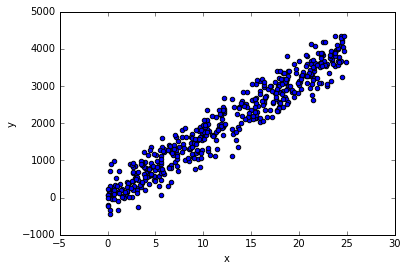

In [6]:
data.plot(x='x', y='y', kind='scatter', color='blue')

### Normalize data with z-score  z-score: $z=\frac{x-\mu}{s}$

In [7]:
data_x_normalized = (data['x'] - data['x'].mean())/data['x'].std()
data_x_normalized = np.array([data_x_normalized]).transpose()

data_y_normalized = (data['y'] - data['y'].mean())/data['y'].std()
data_y_normalized = data_y_normalized.as_matrix()
data_y_normalized

array([ 0.41474147,  1.73622371, -0.44931441, -1.47139594,  1.78266147,
       -0.50456942,  0.97066912, -1.06832107, -1.02043278,  0.94180472,
       -1.46563752, -1.29505047, -1.16461916,  0.84262175, -0.8214834 ,
       -1.35865775,  0.3913518 ,  0.26129794,  1.52375211,  1.12956372,
       -1.88900352, -0.91188522,  1.40982682,  1.00058958, -0.2411348 ,
        0.06820924, -0.44766819,  1.52947974, -0.33699402, -1.54672073,
        1.33573307, -1.87919945,  0.15721554,  1.13914195,  0.89111145,
        1.41689165,  1.15129568,  1.58831678, -0.40233381,  1.62689708,
       -0.94331488, -0.19259088,  1.08654169,  1.54468777, -0.93098734,
       -0.53210916,  1.64489564, -1.26823055,  1.37424324, -1.41212083,
       -0.28426906,  1.87561698,  0.2424552 ,  0.16319415, -0.6055906 ,
        0.31511871,  0.85122547,  0.09713319,  1.82554155, -1.35962418,
        0.28853036,  1.34813688, -1.18055266,  0.75302424,  1.49359352,
        0.3259213 ,  1.41219659,  1.72655529,  1.08131314,  0.70

### Ejecutando descenso en gradiente sobre los datos normalizados

In [8]:
theta = np.array([0,0])
theta = gradient_descend(data_x_normalized, 
                         data_y_normalized, 
                         linear_model, 
                         cost_gradient, 
                         theta, 
                         alpha=0.1, 
                         epsilon=0.000001, 
                         max_iter=1000)
theta

Execution Finished on en 111 iterations


array([ -5.35349542e-17,   9.66156559e-01])

### Prediction aux function

In [9]:
def predecir(x, theta, x_mean, x_std, y_mean, y_std):
    z_score = (x - x_mean)/x_std
    return linear_model(np.array([z_score]), theta) * y_std + y_mean

In [10]:
data.head()

,x,y
0,15.714920,2466.580358
1,24.149574,4072.712900
2,6.387675,1416.404874
3,0.447202,174.164638
4,21.285228,4129.153452


In [11]:
predecir(17.8, theta, data['x'].mean(), data['x'].std(),
         data['y'].mean(), data['y'].std())

2856.2866545094348

### Comparind input data with predicted values

In [12]:
data['y_predicted'] = [ predecir(i, theta,
                                  data['x'].mean(),
                                  data['x'].std(),
                                  data['y'].mean(),
                                  data['y'].std()) for i in data['x']]

data['% Error'] = abs( data['y'] - data['y_predicted']) / data['y']*100

In [13]:
data.head(15)

,x,y,y_predicted,% Error
0,15.714920,2466.580358,2526.332866,2.422484
1,24.149574,4072.712900,3861.075722,5.196467
2,6.387675,1416.404874,1050.342005,25.844508
3,0.447202,174.164638,110.291196,36.674174
4,21.285228,4129.153452,3407.806928,17.469598
5,7.493417,1349.247798,1225.320319,9.184931
6,15.954273,3142.256097,2564.209299,18.395916
7,2.629316,664.062759,455.600000,31.392027
8,1.171127,722.266295,224.848753,68.868995
9,18.363419,3107.174240,2945.444973,5.205027


## Plot Prediction line &  data

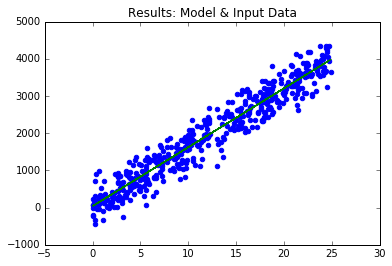

In [74]:
plt.scatter(data['x'], data['y'], color='blue')
plt.plot(data['x'], data['y_predicted'], color='green')
plt.title('Results: Model & Input Data')
plt.show()